# Métodos para encontrar raízes #


Neste Notebook, vamos implementar os métodos de encotrar raízes vistos nas últimas aulas. Além disto, faremos experimentos para medir a __quanto tempo__ cada método está levando com a biblioteca timeit


Para começar, reaproveite seu método da bissecção e o adicione abaixo. Implemente também o método das secantes: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bisseccao(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    for i in range(niter):
        m = (a+b)/2
        fm = f(m)
        fb = f(b)
        if (np.abs(fm) <= minimo) or (np.abs(fm-ant) <= proximidadeIter):
            break
        elif fb*fm > 0:
            b = m
        else:
            a = m
        ant = fm
    return m, i

def secantes(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        a = b
        b = raiz
        ant = fr
    return raiz, i

Para verificar que seu método está funcionando de fato, faça uma versão com gráficos. Faça a bissecção plotar um gráfico com a função, as três primeiras tentativas de raiz e a última. Faça a mesma coisa para o método das secantes, plotando as três primeiras retas geradas e o ponto final. Teste seu método na função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2

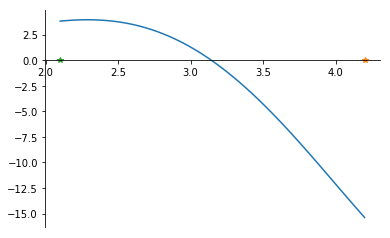

In [42]:
def func(x):
    return x**2*np.sin(x)
def funcd(x):
    return 2*x*np.sin(x) + np.cos(x)*x**2

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')

x = np.linspace(2.1,4.2,100)
plt.plot(x,func(x),4.2,0,'*',2.1,0,'*')

In [4]:
bisseccao(func,2.1,4.2)

(3.1415925979614263, 18)

In [5]:
secantes(func,2.1,4.2)

(3.141592653286708, 7)

In [6]:
def bisseccaog(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x))
    for i in range(niter):
        m = (a+b)/2
        fm = f(m)
        fb = f(b)
        if (i < 3):
            plt.plot(m,0,'r*')
        if (np.abs(fm) < 0.000001) or (np.abs(fm-ant) <= proximidadeIter):
            break
        elif fb*fm > 0:
            b = m
        else:
            a = m
        ant = fm
    plt.plot(m,0,'g*')
    plt.show()
    return m, i

def secantesg(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x))
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (i < 3):
            plt.plot([a,b],[f(a),fb],'r')
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        a = b
        b = raiz
        ant = fr
    plt.plot([a,b],[f(a),f(b)],'g')
    plt.plot(raiz,0,'g*')
    return raiz, i

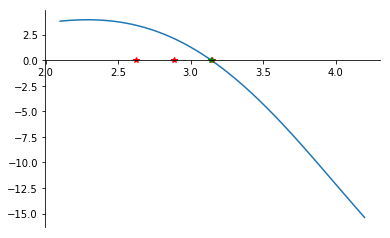

(3.1415925979614263, 18)


In [7]:
print(bisseccaog(func,2.1,4.2))

(3.141592653286708, 7)


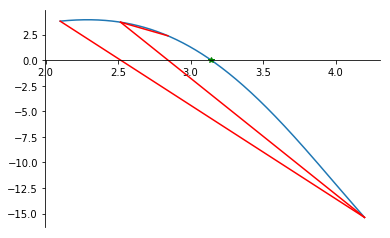

In [8]:
print(secantesg(func,2.1,4.2))

Faça agora o mesmo para o Regula Falsi:

In [9]:
def falsi(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        if fb*fr > 0:
            b = raiz
        else:
            a = raiz
        ant = fr
    return raiz, i

def falsig(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x))
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (i < 3):
            plt.plot([a,b],[f(a),fb],'r')
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        if fb*fr > 0:
            b = raiz
        else:
            a = raiz
        ant = fr
    plt.plot([a,b],[f(a),f(b)],'g')
    plt.plot(raiz,0,'g*')
    return raiz, i

### Método de Newton ###

O método de newton é ligeiramente diferente. Ele precisa apenas de um ponto para fazer achar a nova tentativa de raiz, ao invés de um intervalo. Um exemplo gráfico do funcionamento dele:

https://commons.wikimedia.org/wiki/File:NewtonIteration_Ani.gif

Em contrapartida, o método de Newton precisa de um argumento extra: A derivada da função que se deseja achar a a raiz.

Implemente as duas versões do método de newton, com e sem gráficos:

In [45]:
def newton(f,fd,x, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    raiz = x
    fr = f(raiz)
    while i < niter and (np.abs(fr) > minimo) and (np.abs(fr-ant) > proximidadeIter):
        ant = fr
        raiz -= f(raiz)/fd(raiz)
        fr = f(raiz)
        i += 1
    i-=1
    return raiz,i

def newtong(f,fd,x, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    xs = np.linspace(2.1,4.2,1000)
    plt.plot(xs,f(xs))
    ant = 0
    i = 0
    raiz = x
    fr = f(raiz)
    while i < niter and (np.abs(fr) > minimo) and (np.abs(fr-ant) > proximidadeIter):
        ant = fr
        x = raiz - f(raiz)/fd(raiz)
        if i < 3:
            plt.plot([raiz,x],[fr,0],'r')
        raiz = x
        fr = f(raiz)
        i += 1
    i-=1
    plt.plot([raiz,x],[fr,0],'r')
    plt.plot(raiz,0,'g*')
    return raiz,i


Teste o método de Newton e o Regula Falsi com a função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2 (escolha qualquer um dos dois pontos para Newton:

In [11]:
falsi(func,2.1,4.2)

(3.1415926038540065, 15)

(3.1415926038540065, 15)


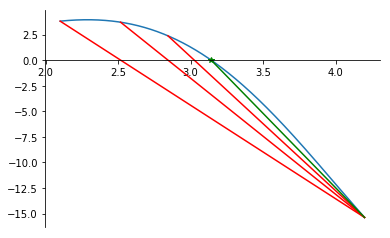

In [12]:
print(falsig(func,2.1,4.2))

In [47]:
newton(func,funcd,4.2)

(3.141592653758602, 3)

(3.141592653758602, 3)

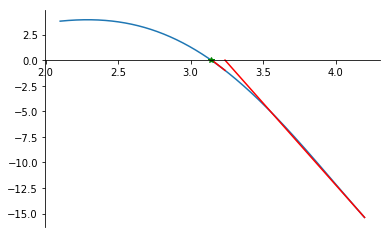

In [46]:
newtong(func,funcd,4.2)

Com todos os métodos implementados, vamos agora ver qual é o melhor em cada cenário. Para isto, vamos ver, além da raiz gerada e do número de iterações, o tempo levado para encontrar a raiz. Para isto, usaremos a biblioteca timeit

In [21]:
def f(x):
    return x^2

# tudo que começa com % é comando jupyter
# roda 10000000 de vezes a função para o valor 10
%timeit -n10000000 f(10)

158 ns ± 2.05 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Como você pode ver, demorou um pouquinho né? Isso porque aquele parametro -n está dizendo para o timeit quantas vezes ele deve rodar o comando f(10), e mostra a média e o desvio padrão de 7 rodadas de 10000000 repetições.


Agora, vamos ao exercício: __você deve encontrar um intervalo onde há uma raiz__ (seja plotando ou usando lagrange), rodar e verificar o tempo de execução, distância da raiz achada de 0 e o número de iterações da bissecção, secantes, regula falsi e Newton para as seguintes funções:

1: $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

2: $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$  

3: $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

4: $f_4(x) = sen(x)x+4$

5: $f_5(x) = (x-3)^5ln(x)$

Entrega: Quinta-Feira, 24/4 via Colabweb

In [50]:
def Lagrange(coef):
    menor = 0
    if coef[-1]<0:
        coef = -coef
    for i in range(len(coef)-1,0,-1):
        if coef[i] < 0:
            menor = i
            break
    return 1+(pow(-min(coef)/coef[len(coef)-1],1/((len(coef)-1)-menor)))

def LimitesAlgebricos(coef):
    limiteSupPos = Lagrange(coef)
    limiteInfPos = 1/Lagrange(np.flip(coef,axis=0))
    aux = coef.copy()
    for i in range(1,len(aux),2):
        aux[i] = -aux[i]
    limiteSupNeg = -Lagrange(aux)
    limiteInfNeg = -1/Lagrange(np.flip(aux,axis=0))
    return (limiteSupPos,limiteInfPos,limiteSupNeg,limiteInfNeg)

### $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

In [113]:
def f1(x):
    return 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
def df1(x):
    return 8*x**3 + 12*x**2 + 6*x - 10

f = f1
df = df1

p1 = [-15,-10,3,4,2]
l1 = LimitesAlgebricos(p1)
l1
# Como só há uma raíz positiva, será usado o intervalo positivo

(2.9574338205844315, 0.6594575734168333, -8.5, -0.6000000000000001)

In [114]:
# Bissecção
%timeit -n100 bisseccao(f,-1.5,0)
r = bisseccao(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

148 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  4.2877410599828636e-07
Interações:  22
Raiz:  -1.3003841042518616


In [115]:
# Secantes
%timeit -n100 secantes(f,-1.5,0)
r = falsi(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

29.9 µs ± 3.04 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  1.7790279471796566e-07
Interações:  7
Raiz:  -1.3003841208637623


In [116]:
# Regula Falsi
%timeit -n100 falsi(f,-1.5,0)
r = falsi(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

46.4 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  1.7790279471796566e-07
Interações:  7
Raiz:  -1.3003841208637623


In [117]:
# Newton
%timeit -n100 newton(f,df,-1.5)
r = newton(f,df,-1.5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

34 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -4.781847700030539e-07
Interações:  2
Raiz:  -1.300384164307794


### $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$ 

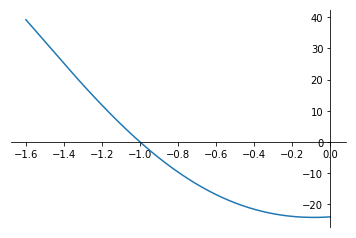

In [123]:
def f2(x):
    return x**5 - 2*x**4 - 9*x**3 + 22*x**2 + 4*x - 24
def df2(x):
    return 5*x**4 - 8*x**3 - 27*x**2 + 44*x + 4

f = f2
df = df2

p2 = [-24,4,22,-9,-2,1]
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
xs = np.linspace(-1.6,0,1000)
plt.plot(xs,f(xs))

In [109]:
# Bissecção
%timeit -n100 bisseccao(f,-1.5,0)
r = bisseccao(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

147 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  8.046627009150598e-07
Interações:  24
Raiz:  -0.9999999850988388


In [110]:
# Secantes
%timeit -n100 secantes(f,-1.5,0)
r = falsi(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

44.6 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  3.2356916790377e-07
Interações:  10
Raiz:  -0.9999999940079785


In [111]:
# Regula Falsi
%timeit -n100 falsi(f,-1.5,0)
r = falsi(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

81.4 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  3.2356916790377e-07
Interações:  10
Raiz:  -0.9999999940079785


In [112]:
# Newton
%timeit -n100 newton(f,df,-1.5)
r = newton(f,df,-1.5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

30.9 µs ± 5.29 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -4.014566457044566e-12
Interações:  3
Raiz:  -1.0000000000000744


### $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

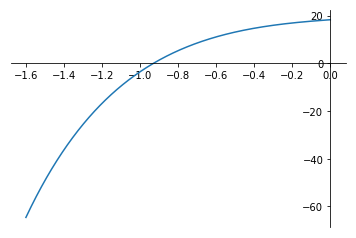

In [124]:
def f3(x):
    return 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20
def df3(x):
    return 15*x**2 + 2*x + 2*np.exp(-2*x + 1) - np.sin(x)

f = f3
df = df3

p2 = [-24,4,22,-9,-2,1]
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
xs = np.linspace(-1.6,0,1000)
plt.plot(xs,f(xs))

In [119]:
# Bissecção
%timeit -n100 bisseccao(f,-1.5,0)
r = bisseccao(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

343 µs ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  1.4619047306041466e-08
Interações:  25
Raiz:  -0.9295604601502419


In [120]:
# Secantes
%timeit -n100 secantes(f,-1.5,0)
r = falsi(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

254 µs ± 45.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -4.804239814859557e-07
Interações:  23
Raiz:  -0.9295604495714597


In [121]:
# Regula Falsi
%timeit -n100 falsi(f,-1.5,0)
r = falsi(f,-1.5,0)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

549 µs ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -4.804239814859557e-07
Interações:  23
Raiz:  -0.9295604495714597


In [122]:
# Newton
%timeit -n100 newton(f,df,-1.5)
r = newton(f,df,-1.5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

135 µs ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  4.927045438307687e-10
Interações:  4
Raiz:  -0.9295604598483701


### $f_4(x) = sen(x)x+4$

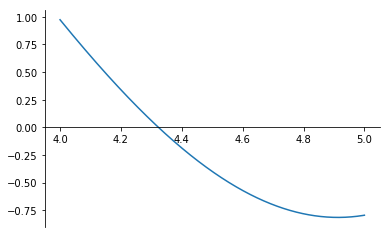

In [128]:
def f4(x):
    return np.sin(x)*x + 4
def df4(x):
    return np.sin(x) + x*np.cos(x)

f = f4
df = df4

p2 = [-24,4,22,-9,-2,1]
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
xs = np.linspace(4,5,1000)
plt.plot(xs,f(xs))

In [132]:
# Bissecção
%timeit -n100 bisseccao(f,4,5)
r = bisseccao(f,4,5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

186 µs ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -5.573155301696886e-07
Interações:  19
Raiz:  4.323239326477051


In [133]:
# Secantes
%timeit -n100 secantes(f,4,5)
r = falsi(f,4,5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

105 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  1.7499900106798805e-07
Interações:  8
Raiz:  4.323239611926789


In [134]:
# Regula Falsi
%timeit -n100 falsi(f,4,5)
r = falsi(f,4,5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

127 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  1.7499900106798805e-07
Interações:  8
Raiz:  4.323239611926789


In [135]:
# Newton
%timeit -n100 newton(f,df,4)
r = newton(f,df,4)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

49.5 µs ± 7.79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -8.067108776543819e-07
Interações:  2
Raiz:  4.32323922926497


### $f_5(x) = (x-3)^5ln(x)$

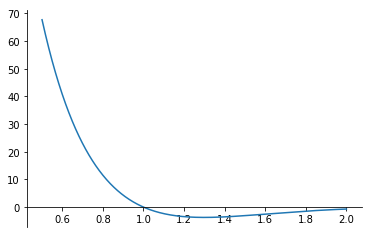

In [144]:
def f5(x):
    return (x-3)**5*np.log(x)
def df5(x):
    return 5*np.log(x)*(x-3)**4 + (x-3)**5/x

f = f5
df = df5

p2 = [-24,4,22,-9,-2,1]
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
xs = np.linspace(0.5,2,1000)
plt.plot(xs,f(xs))

In [145]:
# Bissecção
%timeit -n100 bisseccao(f,0.5,2)
r = bisseccao(f,0.5,2)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

294 µs ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -9.536744016713817e-07
Interações:  23
Raiz:  0.9999999701976776


In [146]:
# Secantes
%timeit -n100 secantes(f,0.5,2)
r = falsi(f,0.5,2)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

298 µs ± 81.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  2.5358565249728796e-06
Interações:  81
Raiz:  1.0000000792455352


In [147]:
# Regula Falsi
%timeit -n100 falsi(f,0.5,2)
r = falsi(f,0.5,2)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

1.05 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  2.5358565249728796e-06
Interações:  81
Raiz:  1.0000000792455352


In [148]:
# Newton
%timeit -n100 newton(f,df,0.5)
r = newton(f,df,0.5)
print("Distância de 0: ",0-f(r[0]))
print("Interações: ",r[1])
print("Raiz: ",r[0])

113 µs ± 33.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Distância de 0:  -1.8487898110904285e-07
Interações:  5
Raiz:  0.9999999942225319
